<a href="https://colab.research.google.com/github/asmaesough/Tweets-Sentiment-Analysis-Facebook-is-Down-Case/blob/main/TweetsFacebookIsDown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the required modules
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
#Load dataset
df = pd.read_csv('/content/TweetsFB.csv')
df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2021-10-04 23:59:56+00:00,1445176896619171842,"While Facebook was down, Amazon was pushing it...",veranmiller
1,1,2021-10-04 23:59:56+00:00,1445176893313937415,"Facebook, Instagram, WhatsApp, and Stayc girls...",imveryfragilebb
2,2,2021-10-04 23:59:54+00:00,1445176885252694017,"the fact that Twitter, IG, and Facebook all we...",joanna_jojo421
3,3,2021-10-04 23:59:47+00:00,1445176855598825475,Facebook search is down. @Facebook fix it.,MissLizLizLiz
4,4,2021-10-04 23:59:42+00:00,1445176837269774339,"@PhilMackey Let me translate, Phil. Facebook ...",bloomtownrat


In [ ]:
df.shape

(10001, 5)

In [ ]:
df['Text'][0]

'While Facebook was down, Amazon was pushing its holiday sales. Unreal. There are 27 days to Halloween and this nonsense is starting.'

## **Data Preprocessing**



In [ ]:
#Delete irrelevent data
df = df.drop(df[['Unnamed: 0',	'Datetime',	'Tweet Id', 'Username']], axis = 1)

In [ ]:
df.head()

,Text
0,"While Facebook was down, Amazon was pushing it..."
1,"Facebook, Instagram, WhatsApp, and Stayc girls..."
2,"the fact that Twitter, IG, and Facebook all we..."
3,Facebook search is down. @Facebook fix it.
4,"@PhilMackey Let me translate, Phil. Facebook ..."


In [ ]:
#How long is the longest tweet?
length_tweets = df.Text.str.len()
l = length_tweets.to_list()

#Finding the review with max length
df["Text"][l.index(max(l))]

"@tnolwene @LordBeige @Wahboom @Lulublutwo @DorisMele @LadyShark57 @NoBulls55224206 @DarrellBuckne13 @Una_Alta_Volta @kcinor @Quin4Trump @ICanPlainlySee @StillFreeSCOTTY @ernestleenot @sgabig @smh8872626 @abd130usa22nq @TrippinBiology @Michel78118339 @TJ2020landslide @truthsearch1957 @ISafeyet @MarlaineDettlo1 @OldPrague @jen95873143 @traveler002 @BravoCompany66 @acfueler @opechanga @MarvinRJeffcoat @Rabbittgirl @SlaterBrowne @robcarlson20 @MarilynLavala @thedude77 @JT375043170 @timetoact2 @CATZPRIDE @baddaddee @jbelluominimsn @clamsroll @RuschTracie @Unpurgeable18 @AGOATnamedBob1 @Freebyrd5555 @BearHunter001 @FehPinky @Sharklady57 @Christo29932651 @OxmanMartin Facebook is down I am getting a trend for\nI don't use FB \n\nThey will shut the webz when the truth hits\n\nThey been slowing and blocking internet here every weekend due to protest\n\nMedia blackout in 3..2..."

In [ ]:
#Finding the review with max length
df["Text"][l.index(min(l))]

'is facebook down'

In [ ]:
#Remove usernames starting with @
import re
for i in df.index:
  df['Text'][i] = re.sub('@[\w]+','',df['Text'][i])

In [ ]:
df.head()

,Text
0,"While Facebook was down, Amazon was pushing it..."
1,"Facebook, Instagram, WhatsApp, and Stayc girls..."
2,"the fact that Twitter, IG, and Facebook all we..."
3,Facebook search is down. fix it.
4,"Let me translate, Phil. Facebook is down."


In [ ]:
#How long is the longest tweet?
length_tweets = df.Text.str.len()
l = length_tweets.to_list()

#Finding the review with max length
df["Text"][l.index(max(l))]

'Pot, kettle, dinner on Twitter because Facebook is down. What a crock. Does it really matter to anyone what color the egg plant is? #gigapopjokes #dadjokes\n\nThere was such a panic over the loss of Instagram dinner photos that they called out the National Guard. Not pho news!!! 🦊 https://t.co/gAG0OM0DaP https://t.co/CzpT5btm5p'

In [ ]:
#Remove URL
import re
for i in df.index:
  df['Text'][i] = re.sub(r"http\S+", "", df['Text'][i])

In [ ]:
#How long is the longest tweet?
length_tweets = df.Text.str.len()
l = length_tweets.to_list()

#Finding the review with max length
df["Text"][l.index(max(l))]

'The world would be a much better place if Facebook &amp; Instagram stayed down. Facebook is a festering hole of political toxicity &amp; a breeding ground for gossip &amp; misinformation. Instagram is teaching our kids narcissism is good, they probably ugly &amp; not good enough.\n\n#facebookdown'

In [ ]:
#Remove hashtags
import re
for i in df.index:
  df['Text'][i] = re.sub(r"#[\w]+", "", df['Text'][i])

In [ ]:
#How long is the longest tweet?
length_tweets = df.Text.str.len()
l = length_tweets.to_list()

#Finding the review with max length
df["Text"][l.index(max(l))]

'  All of that is part of the hooks of evil FB has in us. It’s responsible 4 unspeakable evils around the world, a very real threat 2 our democracy &amp; our country. We’ve gotta give it up. We need a social media without ads, &amp; without censorship, where only outright lies R taken down.'

In [ ]:
#What is the polarity of the tweets?
from textblob import TextBlob
df['Polarity'] = ''
sentiment_objects = [TextBlob(tweet) for tweet in df['Text']]
for i in df.index:
  df['Polarity'][i] = sentiment_objects[i].polarity
df.head()

,Text,Polarity
0,"While Facebook was down, Amazon was pushing it...",-0.0777778
1,"Facebook, Instagram, WhatsApp, and Stayc girls...",-0.155556
2,"the fact that Twitter, IG, and Facebook all we...",-0.155556
3,Facebook search is down. fix it.,-0.155556
4,"Let me translate, Phil. Facebook is down.",-0.155556


In [ ]:
#Add a binary column with 1 if the tweet is positive and 0 if it's negative
df['Positivity'] = ''
for i in df.index :
  if df['Polarity'][i] >= 0 :
    df['Positivity'][i] = 1
  else:
    df['Positivity'][i] = 0
df.head()

,Text,Polarity,Positivity
0,"While Facebook was down, Amazon was pushing it...",-0.0777778,0
1,"Facebook, Instagram, WhatsApp, and Stayc girls...",-0.155556,0
2,"the fact that Twitter, IG, and Facebook all we...",-0.155556,0
3,Facebook search is down. fix it.,-0.155556,0
4,"Let me translate, Phil. Facebook is down.",-0.155556,0


In [ ]:
df['Positivity'].value_counts()

0    6665
1    3336
Name: Positivity, dtype: int64

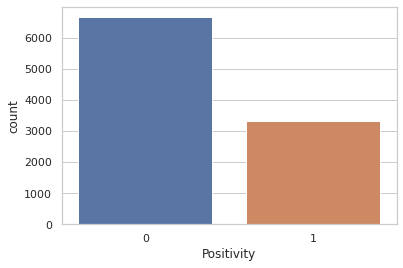

In [ ]:
#Plot classes
import seaborn as sns
sns.countplot(x='Positivity', data=df)

While Facebook was down, most poeple's tweets were negative, and the other part was positive.

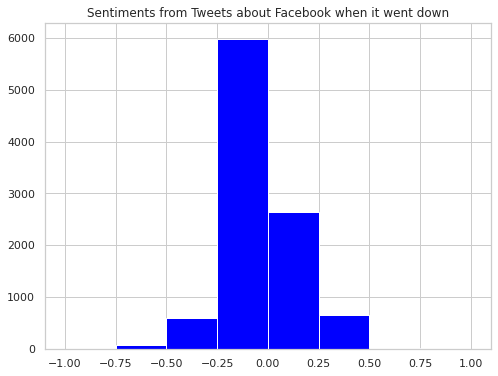

In [ ]:
#Polarity Histogram
fig, ax = plt.subplots(figsize=(8, 6))

df['Polarity'].hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="blue")

plt.title("Sentiments from Tweets about Facebook when it went down")
plt.show()

## **WordCloud**

Most people's opinions were negative.

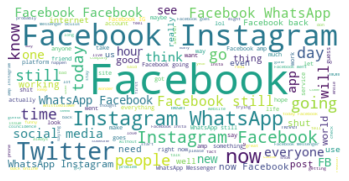

In [ ]:
#Let's build a word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
Cloud_tweets = WordCloud(background_color='white').generate(''.join(df['Text']))
plt.imshow(Cloud_tweets, interpolation='bilinear')
plt.axis('off')
plt.show()

It's obvious that Facebook, Instagram, WhatsApp and Twitter are the most frequent words in the tweets because they were the topic of the day! Let's remove them as well as the stop words and see!

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


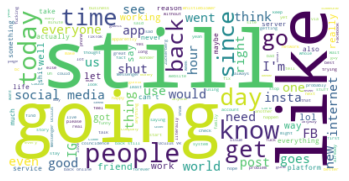

In [ ]:
#Remove Stop words from word clouds
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

#Define the stopwords list
my_stopwords = set(stopwords.words('english'))
my_stopwords.update(["Facebook", 'Instagram', 'WhatsApp', 'Twitter', 'amp'])

#Generate and show the word cloud
my_cloud = WordCloud(background_color='white', stopwords=my_stopwords).generate(''.join(df['Text']))
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The most frequent word is 'still' as a lot of people used Twitter to say that Facebook is still down :)

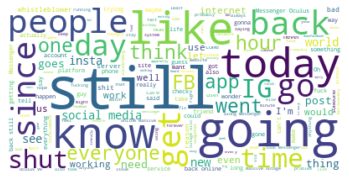

In [ ]:
#Generate and show the word cloud of negative tweets
df_neg = df[df['Positivity'] == 0]['Text']
my_cloud = WordCloud(background_color='white', stopwords=my_stopwords).generate(''.join(df_neg))
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

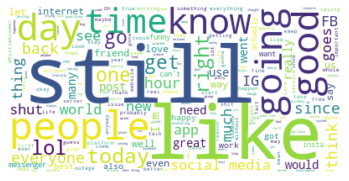

In [ ]:
#Generate and show the word cloud of positive tweets
df_pos = df[df['Positivity'] == 1]['Text']
my_cloud = WordCloud(background_color='white', stopwords=my_stopwords).generate(''.join(df_pos))
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Convert data to lower case
df['Text'] = df['Text'].str.lower()

In [ ]:
#Remove punctuation 
df['Text'] = df['Text'].str.replace('[!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n]','')

## **Stop Words**

In [ ]:
#Remove stopwords from data set
import nltk
nltk.download('punkt')
def remove_stop_words(data):
    stop_words = my_stopwords
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

df['Text'] = df['Text'].apply(remove_stop_words)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Text,Polarity,Positivity
0,facebook amazon pushing holiday sales unreal ...,-0.0777778,0
1,facebook instagram whatsapp stayc girls going,-0.155556,0
2,fact twitter ig facebook went day mitski retu...,-0.155556,0
3,facebook search fix,-0.155556,0
4,let translate phil facebook,-0.155556,0


## **Stemming**

In [ ]:
#Stemming of our data
from nltk.stem import PorterStemmer
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)
porter_stemmer = PorterStemmer()
df['Text'] = df['Text'].apply(stem_sentences)
df.head()

,Text,Polarity,Positivity
0,facebook amazon push holiday sale unreal 27 da...,-0.0777778,0
1,facebook instagram whatsapp stayc girl go,-0.155556,0
2,fact twitter ig facebook went day mitski retur...,-0.155556,0
3,facebook search fix,-0.155556,0
4,let translat phil facebook,-0.155556,0


## **Tokenization**

In [ ]:
#CountVectorizer function
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=0.01)
vect.fit(df.Text)
X = vect.transform(df.Text)

In [ ]:
#Transform to an array
my_array = X.toarray()
#Transform back to a dataframe, assign column names
X_df = pd.DataFrame(my_array, columns=vect.get_feature_names())
X_df.head()

,account,actual,also,anyon,app,ask,back,bad,best,better,busi,ca,call,care,caus,check,come,commun,compani,could,day,delet,down,els,end,even,ever,everi,everyon,everyth,facebook,fact,fb,feel,first,fix,friend,fuck,funni,get,...,shut,sinc,site,social,someon,someth,start,stay,still,take,talk,tell,thank,thing,think,thought,time,today,took,tri,twitter,us,use,user,wait,want,watch,way,well,went,whatsapp,whistleblow,whole,without,wonder,work,world,would,year,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Build the vectorizer, specify token sequence and fit
vect = CountVectorizer(ngram_range=(1,2), min_df=0.005)
vect.fit(df.Text)

#Transform the review column
X_tweet = vect.transform(df.Text)

# Create the bow representation
X_df = pd.DataFrame(X_tweet.toarray(), columns=vect.get_feature_names())
X_df.head()

,60,60 minut,abl,access,account,actual,ago,almost,along,along instagram,alreadi,also,also took,alway,anoth,anyon,anyth,anyway,app,appar,around,ask,away,back,back onlin,bad,bc,believ,best,better,big,billion,birthday,book,break,bring,busi,ca,call,came,...,twitter,twitter facebook,updat,us,use,use facebook,user,vaccin,ve,via,video,vr,wait,want,watch,way,websit,week,weird,well,went,whatsapp,whatsapp facebook,whatsapp instagram,whatsapp messeng,whatsapp still,whistleblow,whole,without,wonder,work,world,worst,would,ye,yeah,year,yet,youtub,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [102]:
# Import the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Arguments of Tfidf
?TfidfVectorizer
my_pattern = r'\b[^\d\W][^\d\W]+\b'
vect = TfidfVectorizer(ngram_range=(1,2), max_features=200, token_pattern=my_pattern, stop_words=my_stopwords).fit(df.Text)
X = vect.transform(df.Text)
X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
X_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['facebook', 'instagram', 'twitter', 'whatsapp'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,account,actual,along,also,anyon,app,ask,back,back onlin,bad,best,better,big,birthday,busi,ca,call,care,caus,check,come,come back,commun,compani,connect,could,day,delet,dn,els,end,even,ever,everi,everyon,everyth,facebook,facebook back,facebook go,facebook goe,...,sure,take,talk,tell,thank,thing,think,thought,time,today,took,tri,twitter,us,use,user,vaccin,via,wait,want,watch,way,websit,well,went,whatsapp,whatsapp facebook,whatsapp instagram,whatsapp messeng,whatsapp still,whistleblow,whole,without,wonder,work,world,worst,would,year,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.607727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.167411,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.157681,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.401042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.350978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096684,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.289574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.402329,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.198586,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.224063,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Machine Learning Models**

In [126]:
#Define labels and attributes
X = X_df
y = df.Positivity

In [127]:
y = y.astype('int')

In [152]:
#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =0)

In [153]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [154]:
def model_Evaluate(model):
  # Predict values for Test dataset
  y_pred = model.predict(X_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1} {v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       340
           1       0.68      0.54      0.60       161

    accuracy                           0.77       501
   macro avg       0.74      0.71      0.72       501
weighted avg       0.76      0.77      0.76       501



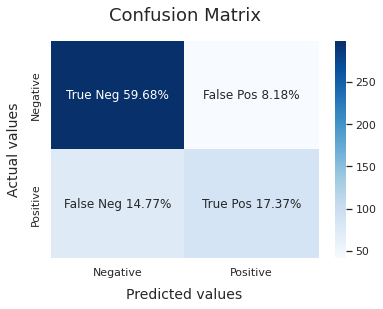

In [155]:
#Fit Bernoulli model
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

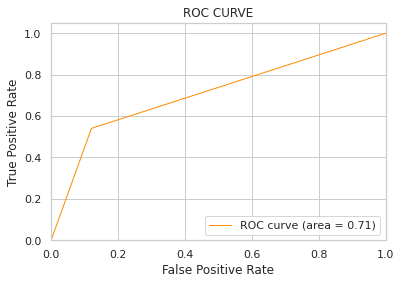

In [156]:
#Plot the ROC-AUC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       340
           1       0.80      0.53      0.64       161

    accuracy                           0.81       501
   macro avg       0.80      0.73      0.75       501
weighted avg       0.81      0.81      0.79       501



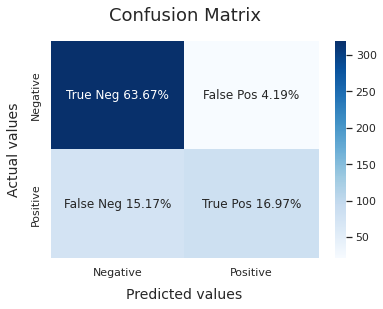

In [157]:
#Fit SVC model
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

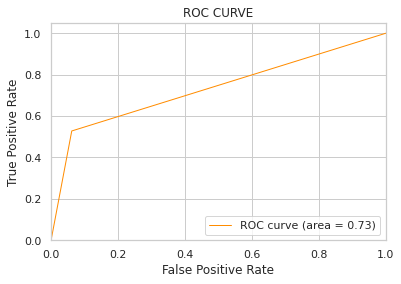

In [158]:
#Plot the ROC-AUC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       340
           1       0.81      0.52      0.63       161

    accuracy                           0.81       501
   macro avg       0.81      0.73      0.75       501
weighted avg       0.81      0.81      0.79       501



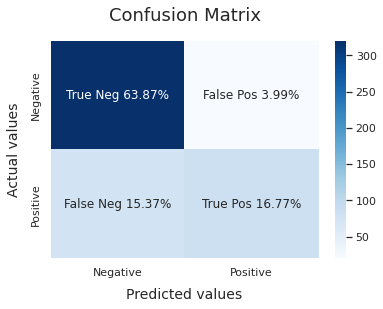

In [159]:
#Fit Logistic Regression model
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

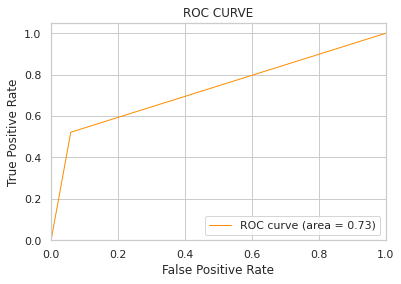

In [160]:
#Plot the ROC-AUC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [161]:
#Build CART Model
from sklearn.tree import  DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=4,min_samples_leaf=0.1)
dtc = dtc.fit(X_train, y_train)
dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [162]:
! pip install graphviz

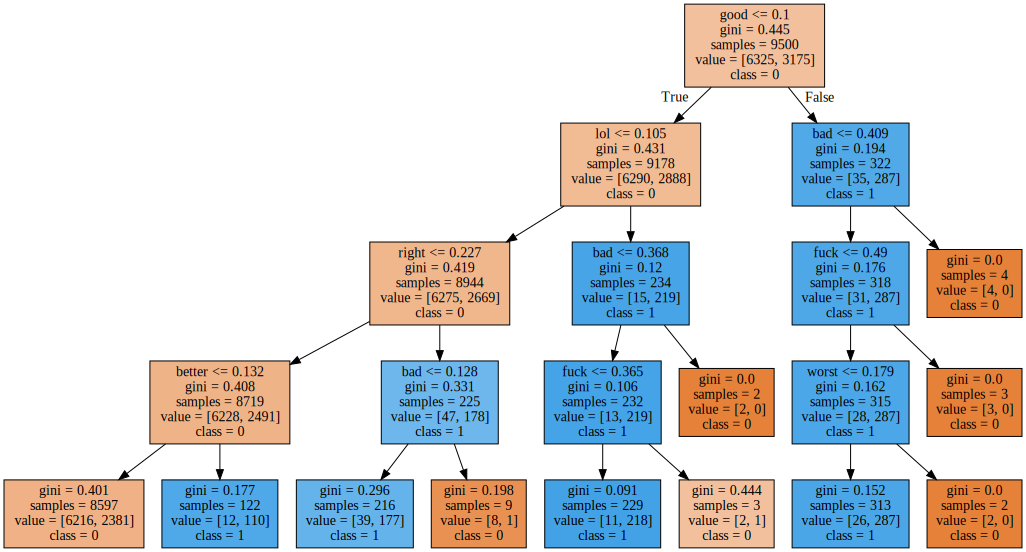

In [163]:
from sklearn import tree
CART = tree.DecisionTreeClassifier(max_depth=4)
CART = CART.fit(X_train, y_train)
import graphviz
graphviz.Source(tree.export_graphviz(CART,feature_names=X_train.columns, filled=True,class_names=["0","1"],out_file=None))

We can see that the negativity of the tweets is mostly related to words such us 'bad', 'fuck', 'social media' and 'everything' while the positivity is related to 'good', 'lol', 'right', 'best' and 'funny'